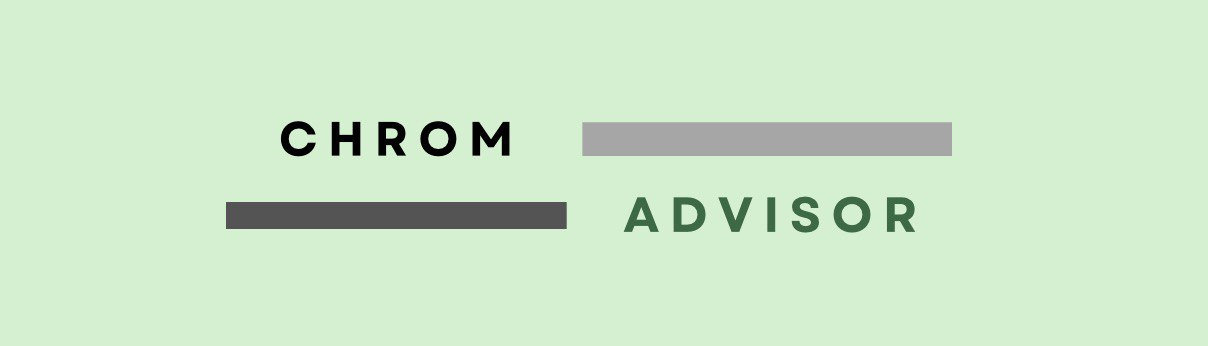

# <center>Chromadvisor</center>
---

## Motivation
The initial idea of this project was to start by identifying the functional groups of molecules. Then, we thought about displaying the molecule in 2D and 3D to give more information to the user. After that, we decided to calculate the polarity of the whole molecule based on the functional groups and give a recommendation of the choice of eluent for a chromatography.

Our project can be used by students or chemists, when doing a chromatography to find the eluent based on the main molecule.

---

### 1. Find functional groups function :
The goal of the **<font color="blue">find_functional_groups</font>** function is to take the smiles of  the molecule to analyze as input and draw out the different functional groups of the molecule, as well as the number of times it is present.

First, we wrote a function capable to detect the functional groups.

We had to put the **<font color="green">output if the input is incorrect</font>**  : "Error : Impossible to convert the SMILES into a molecule."

We then had to choose a **<font color="green">database for the functional groups</font>** that can be detected. For each functional groups in the database found, we decided whether we wanted to keep them so they could be detected. We deleted those we found too complicated and those we didn’t see in our organic course.

As we ran the function, we saw that the function **<font color="red">detected too many functional groups</font>**. For example in the case of acetic acid, the function detected a carboxylic acid but also a hydroxyl and a ketone. In reality, this molecule only possess a carboxylic acid functional group, in fact composed of a ketone and hydroxyl but they should not be in the output of the function.

To remedy this, we had to put an **<font color="green">if statement</font>** such as : if there’s an carboxylic acid, there should not be a ketone and a hydroxyl. But some molecules possess a carboxylic acid AND a hydroxyl, or a ketone, such as salicylic acid. By just excluding the possibility of hydroxyl and ketone in the presence of carboxylic acid, the hydroxyl present would not be detected. We thus decided to use an if statement saying that once a functional group has been detected, its smiles is deleted from the smiles total of the molecule. Once it has been detected and deleted, the analysis of the functional groups continues, without detecting many times one specific functional groups. The list of functional groups used for the detection, also had to be modified for the function to work correctly : the **<font color="green">groups had to be detected by order of “importance”</font>**. This means the functional groups with the “highest number of functional group in it” must be first in the list.

Now to count the **<font color="green">number of appearances of the functional group</font>** we used their positions. In order to **<font color="green">detect the positions</font>**, the function detect the functional group and give all correspondence possible of the motif. Each correspondence returned is a tuple of atom indices. These tuples are stored in a dictionary under the key “position”. To count the number of times the functional is present, we then needed to count the number of tuples of atom indices. This number is stored in the dictionary under the key “count”.

Also in the case of ketone and phenol, the count had to be divided by two because two possibilities of positions were possible and thus **<font color="red">two tuples were created</font>** for one phenol/ketone.

The function then return the dictionary with the functional group’s name, its position  and the nmber of appearance.e

After the functional groups were found, we thought that it was annoying to **<font color="red">always go to a web page to find the SMILES</font>** of the desired molecule. So, I wanted to simplify the user’s input, by asking them to put the name of the molecule in English rather that the SMILES molecule. So that, they did not have to go to the web to find the SMILES. Thus, we created a function called **<font color="blue">get_smiles</font>**, which takes a molecule name in english and returns its SMILES. However, we wanted this to work for all molecules and not just a sample, which meant that writing them all one by one was out of the question. So, we used the **<font color="green">pubchempy module</font>**, which is a Python library that provides an access to the PubChem database. The latter is a repository for chemical molecules and provides informations on their chemical properties for millions of compounds. Thus, using this module made the user's experience with our code much more pleasant.

---

### 2. Display the molecule in 2D and 3D
As explained earlier, we wanted to give more informations to the user than just the recommendation eluent. So, we thought about offering a representation 2D of the molecule, using the function **<font color="blue">display_molecule_2d</font>**, so that even if the user does not know the molecule and just wanted to know which eluent to use, they also would see what the molecule look like.  
This part went pretty smoothly, because the code is short. 

idéal = montrer la mol en 3D avec des vecteurs qui calculent la polarité

---

### 4. Polarity and eluent recommendation

This part of the work was more or less the main purpose of using the code. There are several ways of calculating or estimating the polarity of a molecule. The first thing was to find out which was the most appropriate way of expressing the polarity of a molecule. The first method that came to mind was the description based on its dipole moment, using **<font color="red">PySCF</font>** . Finally, the method used to estimate the polarity of a molecule is **<font color="green">logP</font>** , using a programme called **<font color="blue">Crippen.MolLogP</font>** (both method available in the RDKit library). 

##### Program used, problems encounted and their resolution

PySCF via RDkit was used to calculate the dipole moment. But I had a problem with PySCF's configuration. Calculating the dipole moment of a molecule requires a 3D description and makes use of quantum tools such as Hartree-Fock methods. A special programme allowing quantum calculations such as PySCF could have been used for the calculation. However, using this programme posed a number of difficulties. Particularly when installing it (my computer didn't recognise cmake via pip or conda). 

Therefore I looked for an other way to estimate the polarity, by calculating its logP. We learnt about logP during our analytics TP and this seemed to be a better way to do. The RDkit extension used is Crippen.MolLogP, it calculates the logP. Crippen's approach is based on the additive contribution of each fragment of the molecule to the overall logP value. 

It turns out that calculating the dipole moment was not the best way of estimating the polarity of a molecule because it is a purely mathematical tool. LogP, on the other hand, is described on the basis of experimental observations. This programme is used for laboratory work, so this approach makes more sense.


##### Presentation of the concepts
Polarity: distribution of charges within a molecule. In the context of chromatography, knowledge of the polarity of a molecule is essential for the choice of its elution solvent. A polar molecule interacts strongly with a silica support, so a polar eluent will be needed to create competition and separate the compounds in a mixture. 
logP: The logP is the partition coefficient of a molecule between an apolar phase (octane) and a polar phase (water). A negative logP indicates a polar molecule, so a polar eluent is preferred. The more positive the logP, the more apolar the molecule. Between 0 and 3 the molecule is moderately polar, so a mix of eluents should be used (figures seen during practical work).


##### Conclusion
In the end, the logP method proved to be better suited to what we were looking for in this work. This programme could be extended to ion or gas chromatography.

---

In [ ]:
from rdkit import Chem
from rdkit.Chem import Crippen

In [ ]:
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is None:
        return None, "Invalid SMILES"
    logp = Crippen.MolLogP(molecule)
    recommendation = ""
    if logp > 3:
        recommendation = "Use an apolar eluent such as : hexane or toluene with a bit of EtOH/acetone."
    elif 0 <= logp <= 3:
        recommendation = "Use a mix of DCM/MeOH or a mix of ethyl acetate/hexane."
    else:  # logP < 0
        recommendation = "Use a polar eluent such as : MeOH or acetone, even water."
    return logp, recommendation

### 5. Interface tkinter
One of the main challenges for this project was definitely the interface. We wanted to code an input interface, where the user could put its desired molecule in SMILES and a result interface, with all the provided information.
To do that we used **<font color="green">tkinter</font>**, which is the standard Pyhton library for creating graphical user interface (GUIs). Using this, we could create windows, buttons and error messages.

First of all, we had to define another function named **<font color="blue">on_submit</font>**, so that when the user submitted their desired molecule, the results appeared directly with a submit button.
In the first part of this function is written the code as if we wanted to just print the result without interface. So all the functions were called in this part in order to : get the smiles of the desired molecule, find its functional groups, display the 2D representation calculate its log(P) and finally give an eluent recommendation.

Then, came the part of actually creating an interface.
At first, we created a result_window with the title "Molecule Analysis Result" using the function **<font color="blue">tk.Toplevel</font>** and **<font color="blue">ttk.Frame</font>**, where all the results are displayed. Each result had its own label using the function **<font color="blue">ttk.Label</font>**. Little details as the font were done using the **<font color="blue">ttk.Style</font>** function.

Secondly, the entry window was done using the **<font color="blue">tk.Tk</font>** and **<font color="blue">ttk_Entry</font>** functions. Then, the "submit button" was done using the **<font color="blue">ttk.Button</font>** function. However, after running the code multiple times, we found it annoying to always **<font color="red">click the button</font>** when working from a laptop. So, we bind the key "Enter" of the keyboard to the submit function using the function, so that it would be easier and faster for the user.

That should have been it, but we thought about making the interface even cleaner that just the basic setup. Moreover, when adding the display in 2D of the molecule, it **<font color="red">did not appear entirely on the screen</font>** because the interface was too small. So, we made the interface to be in **<font color="green">landscape</font>** with the informations on the functional groups, polarity and eluent in the left side and the image alone in the right side. This way, it was way cleaner.  
We also thought about modifying the interface so that when the user submitted their desired molecule, the result window was the size of the whole screen, using the module **<font color="green">ctypes</font>**. However, we abandonned the idea because it was **<font color="red">too big</font>** for the infromations that the code provided.

Moreover, the functional groups' label was configured at first to have certain dimensions like the ones of a box, but we changed it to have the size of the number of functional groups found in the submitted molecule. So that, the label was just the list of the various functional groups and there were no **<font color="red">blank space</font>** before or after the list.

One thing we did not succeed, was to **<font color="red">put the 3D display of the molecule in the tkinter interface</font>**. We tried doing the same as for the 2D display but it did not work. This could maybe be the same problem as to why the 3D reprensation of the submitted molecule does not appear when using a file.py but only when using a file.ipynb. Maybe the py3Dmol is only compatible with Jupyter Notebook's files. We really do not know why it did not work.

---

### Code couleur

Texte bleu :
<p style="color:blue;">A REMPLIR</p>

Texte vert :
<p style="color:green;">A REMPLIR</p>

Texte rouge :
<p style="color:red;">A REMPLIR</p>Nom de la fonction et autres : Texte gras bleu 

**<span style="color:blue;">A REMPLIR</span>**

Choses qu'on a faites (ex: trouver database, compter jsp quoi, problèmes réglés, ...) : Texte gras vert

**<span style="color:green;">A REMPLIR</span>**

Problèmes rencontrés : Texte gras rouge

**<span style="color:red;">A REMPLIR</span>*
